In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tensorflow


In [3]:
!pip install numpy pillow

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import cv2
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras import datasets, models, layers

Storing fractured images into arrays

In [5]:
import os

from PIL import Image



def load_images_from_folder(folder, image_size=(224, 224)):

    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:

            img = Image.open(img_path).convert('RGB')

            img = img.resize(image_size)
            img_array = np.array(img)
            images.append(img_array)
            labels.append(1)
        except Exception as e:
            print(f"Could not open image {img_path}: {e}")

    return np.array(images), np.array(labels)


folder_path = '/content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/fractured'
val_folder_path = '/content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/fractured'


images, labels = load_images_from_folder(folder_path)
val_images, val_labels = load_images_from_folder(val_folder_path)


print(f"Loaded {len(images)} images with shape: {images.shape}")
print(f"Labels: {len(labels)}")

print(f"Loaded {len(val_images)} images with shape: {val_images.shape}")
print(f"Labels: {len(val_labels)}")




/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded 4622 images with shape: (4622, 224, 224, 3)
Labels: 4622
Loaded 337 images with shape: (337, 224, 224, 3)
Labels: 337


Taking a look at array

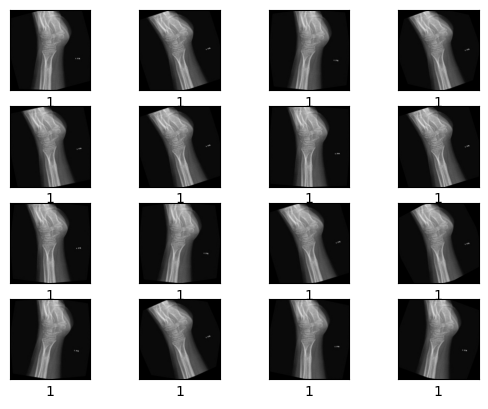

In [19]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])

Storing un_fractured images into arrays

In [7]:




def load_images_from_folder_1(folder, image_size=(224, 224)):

    images_1 = []
    labels_1 = []

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:

            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)
            img_array = np.array(img)
            images_1.append(img_array)
            labels_1.append(0)

        except Exception as e:

            print(f"Could not open image {img_path}: {e}")

    return np.array(images_1), np.array(labels_1)


folder_path_1 = '/content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured'
val_folder_path_1 = '/content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val/not fractured'


images_1, labels_1 = load_images_from_folder_1(folder_path_1)
val_images_1, val_labels_1 = load_images_from_folder_1(val_folder_path_1)


print(f"Loaded {len(images_1)} images with shape: {images_1.shape}")
print(f"Labels: {len(labels_1)}")

print(f"Loaded {len(val_images_1)} images with shape: {val_images_1.shape}")
print(f"Labels: {len(val_labels_1)}")




Could not open image /content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004148.jpg: image file is truncated (14 bytes not processed)
Could not open image /content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004143.jpg: image file is truncated (10 bytes not processed)
Could not open image /content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004134.jpg: image file is truncated (1 bytes not processed)
Could not open image /content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/IMG0004308.jpg: image file is truncated (40 bytes not processed)
Could not open image /content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/I

Taking a look at array

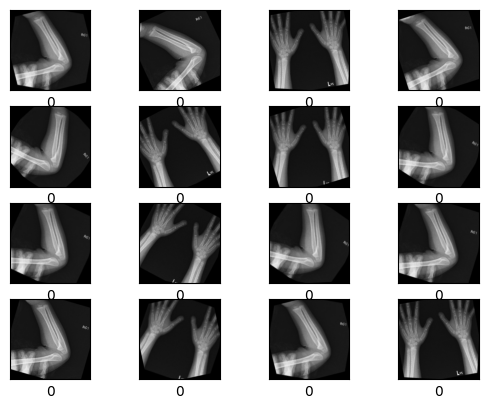

In [18]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images_1[i], cmap=plt.cm.binary)
    plt.xlabel(labels_1[i])

Joining fractured and unfractured array for training and validation data

In [9]:
train_images = np.concatenate((images,images_1))
train_labels = np.concatenate((labels,labels_1))
val_train_images = np.concatenate((val_images,val_images_1))
val_train_labels = np.concatenate((val_labels,val_labels_1))

print(len(train_images))
print(len(train_labels))
print(len(val_train_images))
print(len(val_train_labels))


9260
9260
823
823


Constructing neural network and training it

In [10]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (224,224,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=5,validation_data=(val_train_images,val_train_labels))



Epoch 1/5
290/290 [==============================] - 962s 3s/step - loss: 10.1684 - accuracy: 0.7664 - val_loss: 0.3990 - val_accuracy: 0.8493
Epoch 2/5
290/290 [==============================] - 949s 3s/step - loss: 0.1497 - accuracy: 0.9432 - val_loss: 0.2121 - val_accuracy: 0.9259
Epoch 3/5
290/290 [==============================] - 951s 3s/step - loss: 0.0531 - accuracy: 0.9786 - val_loss: 0.1498 - val_accuracy: 0.9478
Epoch 4/5
290/290 [==============================] - 951s 3s/step - loss: 0.0247 - accuracy: 0.9879 - val_loss: 0.1016 - val_accuracy: 0.9708
Epoch 5/5
290/290 [==============================] - 951s 3s/step - loss: 0.0087 - accuracy: 0.9920 - val_loss: 0.1394 - val_accuracy: 0.9721


Saving the model

In [11]:
model.save('/content/drive/MyDrive/archive (1)/final_model')

Loading the model

In [12]:
model = models.load_model('/content/drive/MyDrive/archive (1)/final_model')

Converting the test images into arrays

In [14]:
test_folder_path = '/content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/fractured'
test_images,test_labels = load_images_from_folder(test_folder_path)

print(f"Loaded {len(test_images)} images with shape: {test_images.shape}")
print(f"Labels: {len(test_labels)}")

test_folder_path_1 = '/content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured'
test_images_1, test_labels_1 = load_images_from_folder_1(test_folder_path_1)

print(f"Loaded {len(test_images_1)} images with shape: {test_images_1.shape}")
print(f"Labels: {len(test_labels_1)}")


Loaded 248 images with shape: (248, 224, 224, 3)
Labels: 248
Could not open image /content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004149.jpg: image file is truncated (33 bytes not processed)
Could not open image /content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004134.jpg: image file is truncated (1 bytes not processed)
Could not open image /content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004347.jpg: image file is truncated (40 bytes not processed)
Could not open image /content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test/not fractured/IMG0004143.jpg: image file is truncated (10 bytes not processed)
Could not open image /content/drive/MyDrive/archive (1)/Bone_Fracture_Binary_Classification/

Concatenating the unfractured and fractured test arrays

In [15]:
test_images_final = np.concatenate((test_images,test_images_1))
test_labels_final = np.concatenate((test_labels,test_labels_1))

print(len(test_images_final))
print(len(test_labels_final))


510
510


Testing the model on testing data

In [17]:
loss,accuracy = model.evaluate(test_images_final,test_labels_final)
print(f"acc on testing data {accuracy}")
print(f"loss on testing data {loss}")

16/16 [==============================] - 14s 860ms/step - loss: 0.0386 - accuracy: 0.9882
acc on testing data 0.9882352948188782
loss on testing data 0.03858109563589096
